# MERIT river/basin area may not be correct
We can scale that to the real area

In [1]:
import pandas as pd
import numpy as np
import os, sys, glob, shutil
import matplotlib.pyplot as plt
import xarray as xr


In [2]:
# basin info
file = '/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/CAMELS_level1_basin_info.csv'
df_info = pd.read_csv(file)

In [5]:
ratio = []
path = '/glade/work/guoqiang/CTSM_CAMELS/mizuroute_settings'
for i in range(len(df_info)):
    idi = df_info.iloc[i]['hru_id']
    areai = df_info.iloc[i]['areaUSGS'] * 1e6
    filei = glob.glob(f'{path}/level1_{i}/ntopo_MERIT_*.nc-RawBasinArea')[0]
    ds=xr.open_dataset(filei)
    area2 = ds.Basin_Area.sum().values
    ratio.append(areai/area2)
    

In [6]:
ratio = []
path = '/glade/work/guoqiang/CTSM_CAMELS/mizuroute_settings'
for i in range(len(df_info)):
    idi = df_info.iloc[i]['hru_id']
    areai = df_info.iloc[i]['areaUSGS'] * 1e6
    filei = glob.glob(f'{path}/level1_{i}/ntopo_MERIT_Hy*.nc')[0]
    ds=xr.load_dataset(filei)
    os.system(f'mv {filei} {filei}-RawBasinArea')
    area2 = ds.Basin_Area.sum().values
    
    ds['Basin_Area'].values = ds['Basin_Area'].values * areai / area2
    ds.to_netcdf(filei)
    

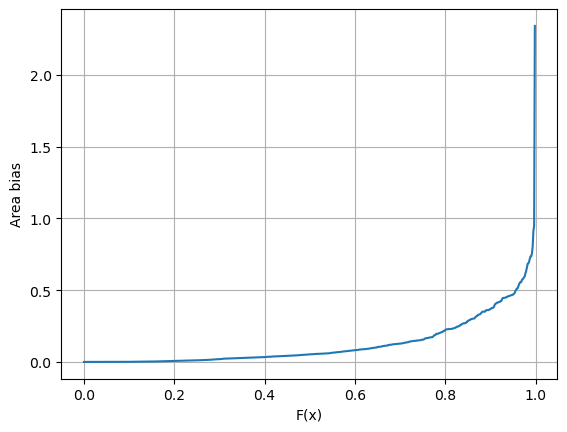

0.16905901116427433


In [15]:
ratio = np.array(ratio)
# plt.hist(ratio - 1, np.arange(-1, 1, 0.1))
# plt.xlabel('Area bias')
plt.plot(np.arange(len(ratio))/len(ratio), np.sort(np.abs(ratio-1)))
plt.grid('on')
plt.xlabel('F(x)')
plt.ylabel('Area bias')
plt.show()
print(np.sum(np.abs(ratio-1)>0.25)/len(ratio))